<a href="https://colab.research.google.com/github/Azmal16/Machine_Learning_Practice/blob/master/Iris/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading and Exploring the Data

##Loading the Modules

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##Loading Dataset
We are using Pandas' *read_csv()* method to read the CSV file from GitHub URL. Names of the columns are pre-specified for convenience. The Dataframe will be assigned to the *dataset* variable.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

##Dimension of Dataset
We can see the number of Rows (Instances) and Columns (Attributes).

In [ ]:
dataset.shape

(150, 5)

##Looking at the Data
*head()* method can be used to see the first 20 instances of the data.

In [ ]:
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


##Statistical Summery
We will look at the statistical summery of of each attribute of our data.

In [ ]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see that *describe()* function shows the number of instances (count), minimum, maximum and mean values, standard deviation and percentiles for each attributes.

##Class distribution
We will see how many instances are there for each class attribute which is also our target variable.

In [ ]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

We can see that each class has 50 instances.

#Visualizing the Data

##Box and Whisker Plot
This type of univariate  plot shows basically most of the data we get from *describe()* method in a box shaped form. As all attributes have numeric values, we can easily plot the data. We can also see the **Outliers** from Box and Whisker Plots.

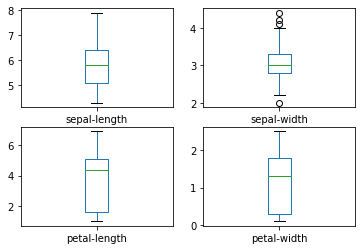

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

These Boxplots show the minimum value, 25th percentile (Q1), median value, 75th percentile (Q3) and the maximum value for each attribute. We can clearly see that "sepal-width" attribute has some outliers.

##Histogram
Histogram is also a univariate plot where we can see the number of instances in a perticular numeric range for each attributes.

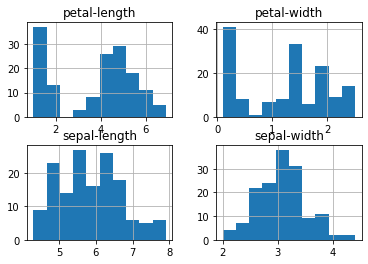

In [ ]:
dataset.hist()
pyplot.show()

Histograms for the four attributes shows us the number of instances at various ranges for each four attributes.

##Correlation
Now we'll look at the correlation among the attributes of the dataset.

In [ ]:
dataset.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


We can see that "sepal_length - petal_length", " sepal_length - petal_width" and "petal_length - petal_width" have most positive correlations. And "petal_length - sepal_width" have most negative correlation.

##Scatter Matrix
Now we will visualize the Correlation of the attributes we just saw earlier. Pandas' *Scatter Matrix* is a great way to visualise correlations among attributes. This is a **Multivariate Plot**.

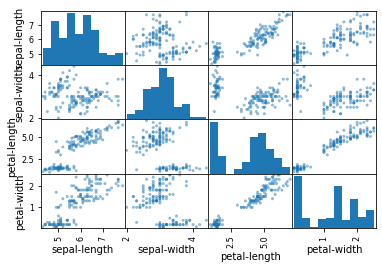

In [ ]:
 
scatter_matrix(dataset)
pyplot.show()

The main diagonal shows the **Histogram** of that attribute for better understanding.

##Heatmap 
Another way to show the correlation

(<matplotlib.axes._subplots.AxesSubplot at 0x7f18629a6b70>,)

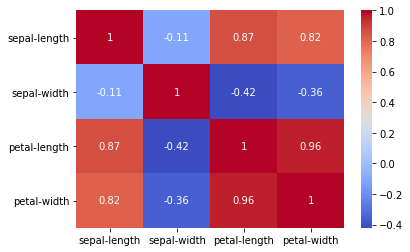

In [ ]:
sns.heatmap(dataset.corr(), cmap = 'coolwarm',  annot=True),

We can clearly see that Petal length and Petal width have highest positive correlation.

##Facegrid
Let's check the relation between Sepal Length and Petal Length of 3 species with the help of **Best Fit Line**.

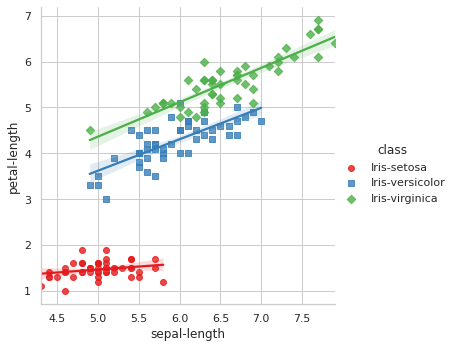

In [ ]:
sns.set(style="whitegrid", color_codes=True)
sns.lmplot(x="sepal-length", y="petal-length", hue="class", data = dataset, \
              palette="Set1", markers=["o", "s", "D"])

##Pairplot
Now we'll look at the pairplot of all the attributes with best fit lines to gain even better understanding.

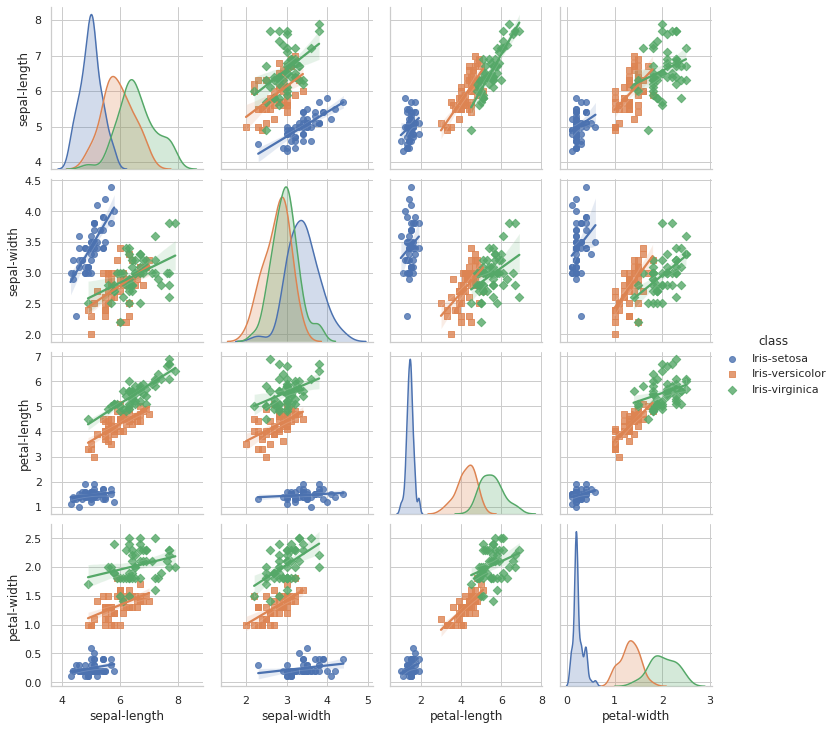

In [ ]:
 sns.pairplot(dataset, kind="reg", hue="class", markers=["o", "s", "D"])

Now, we will plot the ratio of sepal length and sepal width against each and every instances and see the relation for every classes.

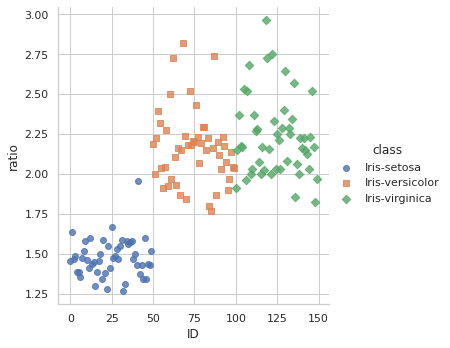

In [ ]:
 dataset["ID"] = dataset.index
dataset["ratio"] = dataset["sepal-length"]/dataset["sepal-width"]
sns.lmplot(x="ID", y="ratio", data=dataset, \
           hue="class", markers=["o", "s", "D"], fit_reg=False, legend=True)

In [ ]:
dataset.values

array([[5.1, 3.5, 1.4, ..., 'Iris-setosa', 0, 1.457142857142857],
       [4.9, 3.0, 1.4, ..., 'Iris-setosa', 1, 1.6333333333333335],
       [4.7, 3.2, 1.3, ..., 'Iris-setosa', 2, 1.46875],
       ...,
       [6.5, 3.0, 5.2, ..., 'Iris-virginica', 147, 2.1666666666666665],
       [6.2, 3.4, 5.4, ..., 'Iris-virginica', 148, 1.823529411764706],
       [5.9, 3.0, 5.1, ..., 'Iris-virginica', 149, 1.9666666666666668]],
      dtype=object)

#Creating Validation Set

In [ ]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

##Building Models
We will now try six models and check which one fits the most. The models we're going to try are:
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6.Support Vector Machines (SVM).
Two of them are linear and four are non-linear.

Now, we'll create our models and check the cross validation scores of each models. That will help evaluating the best model for our data. Let’s build and evaluate our models:

In [ ]:
 
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
 
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.933333 (0.050000)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


As we can see, Support Vector Machines (SVM) has the highest mean cross validation score.

##Comparing the Algorithms
A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

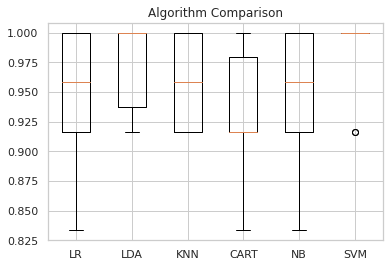

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

##Making Prediction
We will use SVM Algorithm for making predictions as it seemed most promising from our previous analysis.
We can fit the model on the entire training dataset and make predictions on the validation dataset.

In [ ]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

##Evaluating Prediction
We can evaluate the predictions by comparing them to the expected results in the validation set, then calculate classification accuracy, as well as a confusion matrix and a classification report, which show the followings: <br /> <br />
**Precision:** Precision is the ability of a classiifer to label an instance properly. We can say it in another way, “for all instances classified "Setosa", what percent was correct?” <br /> <br />
**Recall:** Recall is the ability of a classifier to find all correct instances. We can say it in another way, “for all instances that were actually "Setosa", what percent was classified correctly?”<br /> <br />
**f1 Score:** The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.<br /> <br />
**Support:** Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

In [ ]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



We can see that the accuracy is 96% on the hold out dataset.
The confusion matrix provides an indication of the errors made. The classification report provides a breakdown of each class by precision, recall, f1-score and support.